In [1]:
import pandas as pd
import altair as alt

In [2]:
files = ["adolescent-births-2016", 
"birth-rates-for-young-adult-women-2016",
"child-housing-problems-2016",
"child-living-arrangements-2016",
"child-maltreatment-2016",
"child-poverty-percent-2016",
"exposure-to-violence-among-children-2016",
"naep04-reading-2016",
"young-adult-living-arrangements-2016"]

CSVs = []

for file in files:
    string_name = file + ".csv"
    csv = pd.read_csv(string_name, encoding = 'cp437')
    csv = csv.replace('û', '-', regex=True)  # Some CSVs have encoding issue where '-' is encoded as 'û'
    csv["Notes"] = 0   # Add 'Notes' column if it does not exist
    csv["Note"] = 0 # Add 'Note' column if it does not exist
    csv = csv.drop(columns = ["Notes", "Note"])  # Drop Notes column
    #csv = csv.dropna()   # Drop rows with NAs
    CSVs.append(csv)

In [3]:
adolesent_births = CSVs[0].rename(columns={"Percentage":"Rate (per 1,000 Females)"}
              ).drop(columns = ["Characteristic", "Standard Error on Percentage"]
                    ).dropna()

young_woman_births = CSVs[1].drop(columns="Characteristic").dropna()
young_woman_births = young_woman_births[['Race/ethnicity', 'Year', 'Rate (per 1,000 Females)', 'Age']]

child_housing_problems = CSVs[2]

child_living_arrangements = CSVs[3].drop(columns="Characteristic").dropna()

child_maltreatment = CSVs[4].drop(columns = ["Characteristic", "Race/ethnicity"]).dropna()

child_poverty_percent = CSVs[5].drop(columns=["Characteristic", "Note on Percent"]).dropna()

exposure_to_violent_crime = CSVs[6].drop(columns=["Characteristic", "Note on Percent", "Note on Count"]).dropna()

reading_scores = CSVs[7].drop(columns="Characteristic").dropna()

young_adult_living_arrangements = CSVs[8].drop(columns="Characteristic").dropna()

In [4]:
# Add column to be consistent with 'young_woman_births' df
adolesent_births["Age"] = "Ages 15-17"
#adolesent_births

In [5]:
# Change "Year type to int
young_woman_births["Year"] = young_woman_births["Year"].astype("int64")

In [6]:
test = "Total - Hispanic, With severe housing problems"

In [7]:
test.split(sep = ",")

['Total - Hispanic', ' With severe housing problems']

In [8]:
child_housing_problems["Characteristic"] = child_housing_problems["Characteristic"].str.replace("Total - ", "")
#child_housing_problems

In [9]:
# Split the character column by racial category and housing variable
child_housing_problems["Characteristic"].str.rsplit(", ", expand=True, n=1)

# Set the housing variable as a column in the df
child_housing_problems["housing_situation"] = child_housing_problems["Characteristic"].str.rsplit(", ", expand=True, n=1)[1]

# Set the characteristic column to be consistent with the other dataframes
child_housing_problems["characteristic"] = child_housing_problems["Characteristic"].str.rsplit(", ", expand=True, n=1)[0]

# Drop the old Characteristic column
child_housing_problems = child_housing_problems.drop(columns = ["Characteristic"])

# child_housing_problems

In [10]:
# TODO
# How to aggregate this data so it's useful 
# child_maltreatment

In [11]:
pd.set_option('display.max_rows', 100)
child_poverty_percent['percent_living_in_poverty'] = child_poverty_percent['Percentage']
child_poverty_percent = child_poverty_percent.drop(columns = "Percentage")


In [12]:
# Change column name
exposure_to_violent_crime['percent_exposed_to_violent_crime'] = exposure_to_violent_crime['Percentage']
exposure_to_violent_crime = exposure_to_violent_crime.drop(columns = 'Percentage')

# Change column name
exposure_to_violent_crime['count_exposed_to_violent_crime'] = exposure_to_violent_crime['Count']
exposure_to_violent_crime = exposure_to_violent_crime.drop(columns = 'Count')

In [13]:
reading_scores['4th_grade_reading_scale_scores'] = reading_scores['Score']
reading_scores = reading_scores.drop(columns = 'Score')

In [14]:
# No changes
# young_adult_living_arrangements


In [15]:
adolesent_births.dtypes

Race/ethnicity               object
Year                          int64
Rate (per 1,000 Females)    float64
Age                          object
dtype: object

In [16]:
young_woman_births.pivot(columns = "Age", values = ["Year", "Race/ethnicity", "Rate (per 1,000 Females)"]).stack()


,,Year,Race/ethnicity,"Rate (per 1,000 Females)"
,Age,,,
15,Ages 18-19,2000,"White, non-Hispanic",57.5
16,Ages 18-19,2001,"White, non-Hispanic",54.7
17,Ages 18-19,2002,"White, non-Hispanic",52
18,Ages 18-19,2003,"White, non-Hispanic",52
19,Ages 18-19,2004,"White, non-Hispanic",48.6
...,...,...,...,...
175,Ages 20-24,2010,Asian/Pacific Islander,42.6
176,Ages 20-24,2011,Asian/Pacific Islander,41.9
177,Ages 20-24,2012,Asian/Pacific Islander,41.4


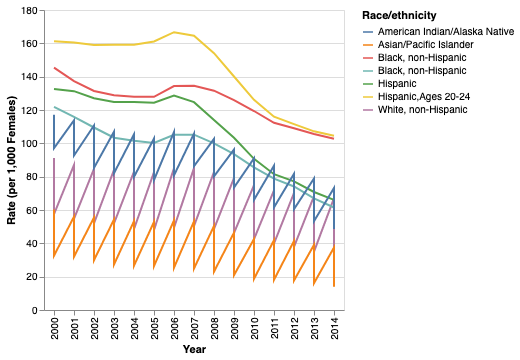

In [17]:
alt.Chart(young_woman_births).mark_line().encode(
    x = alt.X("Year:O"),
    y = alt.Y("Rate (per 1,000 Females):Q"),
    color = alt.Color("Race/ethnicity"))

In [18]:
adolesent_births.merge(young_woman_births, on = ['Race/ethnicity', 'Year'], how='inner')

,Race/ethnicity,Year,"Rate (per 1,000 Females)_x",Age_x,"Rate (per 1,000 Females)_y",Age_y
0,"White, non-Hispanic",2000,15.8,Ages 15-17,57.5,Ages 18-19
1,"White, non-Hispanic",2000,15.8,Ages 15-17,91.2,Ages 20-24
2,"White, non-Hispanic",2001,14.0,Ages 15-17,54.7,Ages 18-19
3,"White, non-Hispanic",2001,14.0,Ages 15-17,87.0,Ages 20-24
4,"White, non-Hispanic",2002,13.1,Ages 15-17,52.0,Ages 18-19
...,...,...,...,...,...,...
115,Asian/Pacific Islander,2012,4.1,Ages 15-17,41.4,Ages 20-24
116,Asian/Pacific Islander,2013,3.7,Ages 15-17,16.1,Ages 18-19
117,Asian/Pacific Islander,2013,3.7,Ages 15-17,39.1,Ages 20-24
118,Asian/Pacific Islander,2014,3.3,Ages 15-17,13.9,Ages 18-19


In [19]:
young_woman_births

,Race/ethnicity,Year,"Rate (per 1,000 Females)",Age
15,"White, non-Hispanic",2000,57.5,Ages 18-19
16,"White, non-Hispanic",2001,54.7,Ages 18-19
17,"White, non-Hispanic",2002,52.0,Ages 18-19
18,"White, non-Hispanic",2003,52.0,Ages 18-19
19,"White, non-Hispanic",2004,48.6,Ages 18-19
...,...,...,...,...
175,Asian/Pacific Islander,2010,42.6,Ages 20-24
176,Asian/Pacific Islander,2011,41.9,Ages 20-24
177,Asian/Pacific Islander,2012,41.4,Ages 20-24
178,Asian/Pacific Islander,2013,39.1,Ages 20-24
